In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Define parameters
image_size = (150, 150)
batch_size = 32
num_epochs = 30
train_data_dir = '/content/drive/MyDrive/plantdisease/train_leaf'
test_data_dir = '/content/drive/MyDrive/plantdisease/test_leaf'

# Enhanced Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3
)

# Rescale the pixel values for the test data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load training data with a maximum of 30 photos per class
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42,
    interpolation='nearest'
)

# Load test data with a maximum of 30 photos per class
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    interpolation='nearest'
)

# Define LeNet-5 model
model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Save the trained model in the native Keras format
model.save("crop_disease_LeNet5.keras")


Found 140 images belonging to 14 classes.
Found 70 images belonging to 14 classes.


Epoch 1/30
4/4 [==============================] - 87s 23s/step - loss: 3.3709 - accuracy: 0.0625 - val_loss: 2.7521 - val_accuracy: 0.0938
Epoch 2/30
4/4 [==============================] - 4s 925ms/step - loss: 2.6520 - accuracy: 0.0781 - val_loss: 2.5713 - val_accuracy: 0.1406
Epoch 3/30
4/4 [==============================] - 3s 781ms/step - loss: 2.6085 - accuracy: 0.0648 - val_loss: 2.5834 - val_accuracy: 0.0938
Epoch 4/30
4/4 [==============================] - 3s 758ms/step - loss: 2.5821 - accuracy: 0.1389 - val_loss: 2.5649 - val_accuracy: 0.1094
Epoch 5/30
4/4 [==============================] - 5s 1s/step - loss: 2.5633 - accuracy: 0.1111 - val_loss: 2.5156 - val_accuracy: 0.1719
Epoch 6/30
4/4 [==============================] - 4s 859ms/step - loss: 2.5539 - accuracy: 0.1406 - val_loss: 2.5197 - val_accuracy: 0.1875
Epoch 7/30
4/4 [==============================] - 4s 905ms/step - loss: 2.5335 - accuracy: 0.1406 - val_loss: 2.4370 - val_accuracy: 0.1719
Epoch 8/30
4/4 [========

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **lenet-5**

Found 140 images belonging to 14 classes.
Found 70 images belonging to 14 classes.


Epoch 1/30
4/4 [==============================] - 7s 1s/step - loss: 2.7324 - accuracy: 0.0185 - val_loss: 2.6362 - val_accuracy: 0.1406
Epoch 2/30
4/4 [==============================] - 3s 1s/step - loss: 2.6084 - accuracy: 0.1481 - val_loss: 2.6003 - val_accuracy: 0.1562
Epoch 3/30
4/4 [==============================] - 5s 1s/step - loss: 2.5635 - accuracy: 0.1389 - val_loss: 2.5359 - val_accuracy: 0.1719
Epoch 4/30
4/4 [==============================] - 3s 1s/step - loss: 2.5482 - accuracy: 0.1759 - val_loss: 2.4494 - val_accuracy: 0.1875
Epoch 5/30
4/4 [==============================] - 5s 1s/step - loss: 2.4684 - accuracy: 0.1953 - val_loss: 2.3343 - val_accuracy: 0.2812
Epoch 6/30
4/4 [==============================] - 4s 1s/step - loss: 2.3778 - accuracy: 0.1759 - val_loss: 2.3009 - val_accuracy: 0.2188
Epoch 7/30
4/4 [==============================] - 4s 760ms/step - loss: 2.2975 - accuracy: 0.2500 - val_loss: 2.1437 - val_accuracy: 0.2812
Epoch 8/30
4/4 [======================

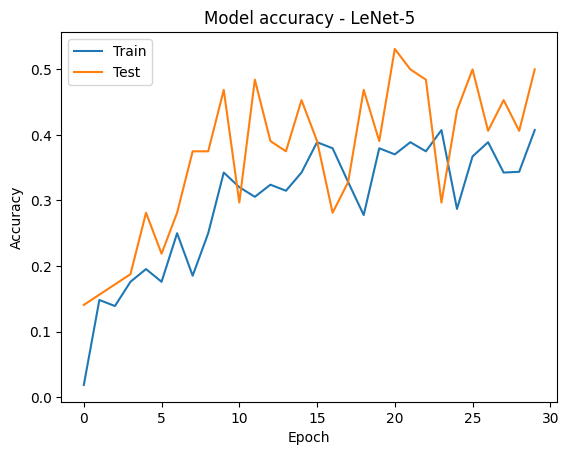

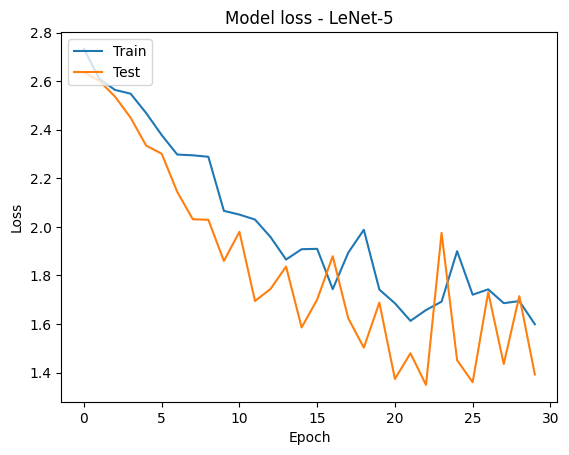

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

# Define parameters
image_size = (150, 150)
batch_size = 32
num_epochs = 30
train_data_dir = '/content/drive/MyDrive/plantdisease/train_leaf'
test_data_dir = '/content/drive/MyDrive/plantdisease/test_leaf'

# Enhanced Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3
)

# Rescale the pixel values for the test data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load training data with a maximum of 30 photos per class
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42,
    interpolation='nearest'
)

# Load test data with a maximum of 30 photos per class
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    interpolation='nearest'
)

# Define LeNet-5 model
model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Save the trained model in the native Keras format
model.save("crop_disease_LeNet5.keras")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy - LeNet-5')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss - LeNet-5')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Found 140 images belonging to 14 classes.
Found 70 images belonging to 14 classes.


Epoch 1/30
4/4 [==============================] - 217s 47s/step - loss: 98.0952 - accuracy: 0.0463 - val_loss: 2643293.0000 - val_accuracy: 0.0625
Epoch 2/30
4/4 [==============================] - 155s 47s/step - loss: 44.6091 - accuracy: 0.0741 - val_loss: 30820230.0000 - val_accuracy: 0.0781
Epoch 3/30
4/4 [==============================] - 201s 53s/step - loss: 21.8874 - accuracy: 0.0781 - val_loss: 438090496.0000 - val_accuracy: 0.0781
Epoch 4/30
4/4 [==============================] - 181s 47s/step - loss: 11.8966 - accuracy: 0.1019 - val_loss: 535690272.0000 - val_accuracy: 0.0781
Epoch 5/30
4/4 [==============================] - 160s 40s/step - loss: 6.9287 - accuracy: 0.1019 - val_loss: 188405792.0000 - val_accuracy: 0.0781
Epoch 6/30
4/4 [==============================] - 201s 53s/step - loss: 7.7759 - accuracy: 0.0859 - val_loss: 766486784.0000 - val_accuracy: 0.0625
Epoch 7/30
4/4 [==============================] - 175s 53s/step - loss: 23.0537 - accuracy: 0.0648 - val_loss: 

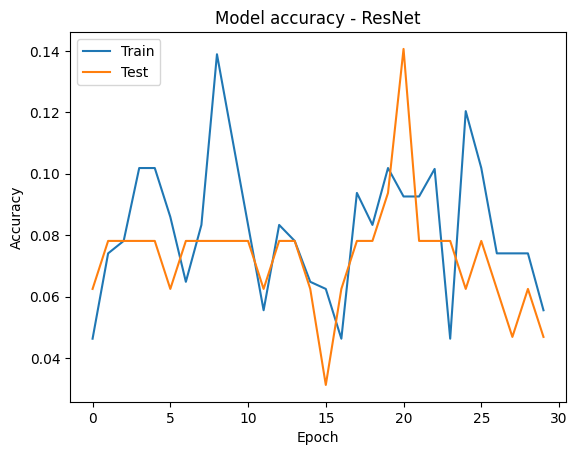

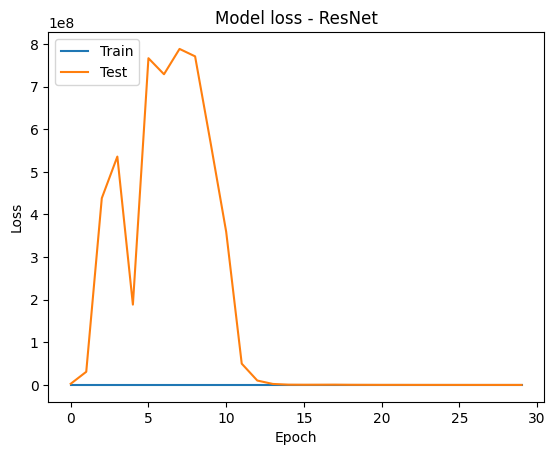

In [ ]:


import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Add, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define parameters
image_size = (150, 150)
batch_size = 32
num_epochs = 30
train_data_dir = '/content/drive/MyDrive/plantdisease/train_leaf'
test_data_dir = '/content/drive/MyDrive/plantdisease/test_leaf'

# Enhanced Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3
)

# Rescale the pixel values for the test data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load training data with a maximum of 30 photos per class
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42,
    interpolation='nearest'
)

# Load test data with a maximum of 30 photos per class
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    interpolation='nearest'
)

# Define ResNet model
def resnet_block(x, filters, kernel_size=3, strides=1, activation='relu'):
    y = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same')(x)
    y = BatchNormalization()(y)
    if activation:
        y = Activation(activation)(y)
    return y

def resnet_identity_block(tensor, filters):
    x = resnet_block(tensor, filters)
    x = resnet_block(x, filters, activation=None)
    # Adjust the shapes to match by adding a 1x1 convolution if necessary
    if tensor.shape[-1] != filters:
        tensor = Conv2D(filters, kernel_size=(1, 1), padding='same')(tensor)
    x = Add()([tensor, x])
    x = Activation('relu')(x)
    return x

inputs = Input(shape=(image_size[0], image_size[1], 3))
x = resnet_block(inputs, 64)
x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

num_res_blocks = 4
for i in range(num_res_blocks):
    x = resnet_identity_block(x, 64)

x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

num_res_blocks = 6
for i in range(num_res_blocks):
    x = resnet_identity_block(x, 128)

x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

num_res_blocks = 6
for i in range(num_res_blocks):
    x = resnet_identity_block(x, 256)

x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

num_res_blocks = 3
for i in range(num_res_blocks):
    x = resnet_identity_block(x, 512)

x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(len(train_generator.class_indices), activation='softmax')(x)

model = Model(inputs, x)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy - ResNet')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss - ResNet')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Found 140 images belonging to 14 classes.
Found 70 images belonging to 14 classes.


Epoch 1/30
4/4 [==============================] - 145s 33s/step - loss: 2.6479 - accuracy: 0.0556 - val_loss: 2.6383 - val_accuracy: 0.0781
Epoch 2/30
4/4 [==============================] - 131s 32s/step - loss: 2.6412 - accuracy: 0.0556 - val_loss: 2.6381 - val_accuracy: 0.0781
Epoch 3/30
4/4 [==============================] - 151s 39s/step - loss: 2.6408 - accuracy: 0.0781 - val_loss: 2.6370 - val_accuracy: 0.0781
Epoch 4/30
4/4 [==============================] - 142s 37s/step - loss: 2.6394 - accuracy: 0.0703 - val_loss: 2.6400 - val_accuracy: 0.0625
Epoch 5/30
4/4 [==============================] - 125s 31s/step - loss: 2.6408 - accuracy: 0.0833 - val_loss: 2.6395 - val_accuracy: 0.0781
Epoch 6/30
4/4 [==============================] - 125s 31s/step - loss: 2.6416 - accuracy: 0.0463 - val_loss: 2.6385 - val_accuracy: 0.0781
Epoch 7/30
4/4 [==============================] - 122s 30s/step - loss: 2.6397 - accuracy: 0.0926 - val_loss: 2.6396 - val_accuracy: 0.0625
Epoch 8/30
4/4 [====

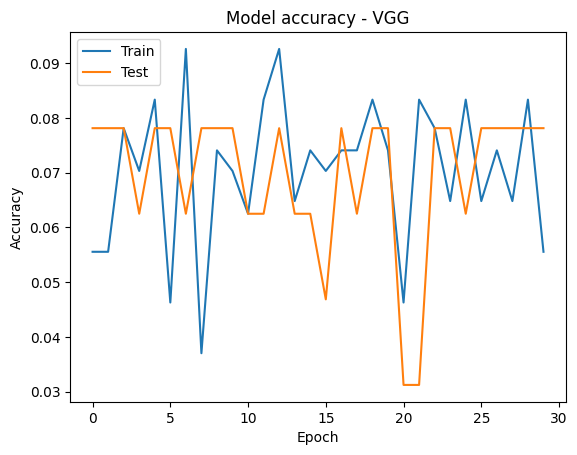

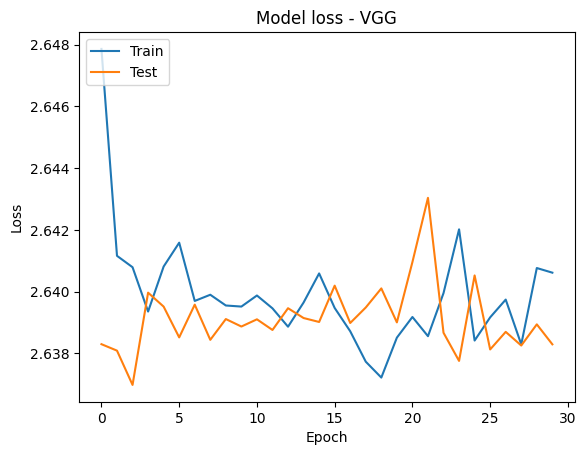

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define parameters
image_size = (150, 150)
batch_size = 32
num_epochs = 30
train_data_dir = '/content/drive/MyDrive/plantdisease/train_leaf'
test_data_dir = '/content/drive/MyDrive/plantdisease/test_leaf'

# Enhanced Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3
)

# Rescale the pixel values for the test data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load training data with a maximum of 30 photos per class
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42,
    interpolation='nearest'
)

# Load test data with a maximum of 30 photos per class
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    interpolation='nearest'
)

# Define VGG-style model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(image_size[0], image_size[1], 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy - VGG')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss - VGG')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
